# Introduction

Instagram generates a lot of data every day. When content creators post on Instagram, they do look at their engagement and reach to find the category of posts they should post more.

We will analyze and predict the reach of this Instagram account to find out how Instagram works.

Exploratory data analysis (EDA) is a Data Science concept where we analyze a dataset to discover patterns, trends, and relationships within the data. It helps us better understand the information contained in the dataset and guides us in making informed decisions and formulating strategies to solve real business problems.

We will start by importing all the necessary libraries.

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Importing

Next we'll import the data and have a look at the first 5 rows.

In [47]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\Instagram data.csv", encoding="latin1")

In [198]:
df.head(5)

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Heres how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  Words count in Caption  \
0  #finance #money #business #investing #investme...                      16   
1  #healthcare #health #covid #data #datascience ...                      34   
2  #data #datascience #dataanalysis #dataanalytic...                      20   
3  #python #pythonprogramming #pythonprojects #py...                      41   
4  #datavisualization #datascience #data #dataana...                      28   

   Hashtag count  
0             22  
1             18  
2             18  
3             11  
4             29

# Data Preprocessing

We will create new columns to obtain the numeric count of no. of words in caption and no. of hashtags used for a post.

In [57]:
df['Words count in Caption'] = df['Caption'].str.split().apply(lambda x: len(x))

In [61]:
df['Hashtag count'] = df['Hashtags'].str.split('#').apply(lambda x: len(x) - 1)

In [60]:
df['Hashtags'].str.split('#')


0      [, finance , money , business , investing , in...
1      [, healthcare , health , covid , data , datasc...
2      [, data , datascience , dataanalysis , dataana...
3      [, python , pythonprogramming , pythonprojects...
4      [, datavisualization , datascience , data , da...
                             ...                        
114    [, datascience , datasciencejobs , datascience...
115    [, machinelearning , machinelearningalgorithms...
116    [, machinelearning , machinelearningalgorithms...
117    [, datascience , datasciencejobs , datascience...
118    [, python , pythonprogramming , pythonprojects...
Name: Hashtags, Length: 119, dtype: object

In [199]:
df.head(5)

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Heres how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  Words count in Caption  \
0  #finance #money #business #investing #investme...                      16   
1  #healthcare #health #covid #data #datascience ...                      34   
2  #data #datascience #dataanalysis #dataanalytic...                      20   
3  #python #pythonprogramming #pythonprojects #py...                      41   
4  #datavisualization #datascience #data #dataana...                      28   

   Hashtag count  
0             22  
1             18  
2             18  
3             11  
4             29

We will obtain all the info of the dataset.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Impressions             119 non-null    int64 
 1   From Home               119 non-null    int64 
 2   From Hashtags           119 non-null    int64 
 3   From Explore            119 non-null    int64 
 4   From Other              119 non-null    int64 
 5   Saves                   119 non-null    int64 
 6   Comments                119 non-null    int64 
 7   Shares                  119 non-null    int64 
 8   Likes                   119 non-null    int64 
 9   Profile Visits          119 non-null    int64 
 10  Follows                 119 non-null    int64 
 11  Caption                 119 non-null    object
 12  Hashtags                119 non-null    object
 13  Words count in Caption  119 non-null    int64 
 14  Hashtag count           119 non-null    int64 
dtypes: int

Let's check for outliers.

In [92]:
plt.figure(figsize=(25,10), dpi=1000)
df.boxplot()
plt.show()

Since our dataset is small, we will include all the rows and continue with our analysis.

# Descriptive Statistics and Correlation

Descriptive statistics help us understand the center and spread of data, using measures like mean, median, mode, variance, and standard deviation.

Let's obtain the descriptive statistics of the data.

In [64]:
df.describe()

Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   82.378947       87.088402   
min      22.000000    0.000000    0.000000   72.000000        4.000000   
25%      65.000000    4.000000    3.000000  121.500000       15.000000   
50%     109.000000    6.000000    6.000000  151.000000       23.000000   
75%     169.000000    8.000000   13.500000  204.000000       42.000000   
max    1095.000000   19.000000   75.000000  549.000000      611.000000   

          Follows  Words count in Caption  Hashtag count  
count  119.000000              119.000000     119.000000  
mean    20.756303               33.134454      18.957983  
std     40.921580               24.372089       4.861462  
min      0.000000                8.000000      10.000000  
25%      4.000000               16.000000      17.000000  
50%      8.000000               28.000000      18.000000  
75%     18.000000               40.000000      21.000000  
max    260.000000              134.000000      30.000000

We will obtain the correlation of the columns using this statistical data and plot it using heat map.

In [96]:
df_corr = df.describe().corr()
df_corr

Impressions  From Home  From Hashtags  From Explore  \
Impressions                1.000000   0.997299       0.996691      0.988255   
From Home                  0.997299   1.000000       0.990500      0.976443   
From Hashtags              0.996691   0.990500       1.000000      0.985987   
From Explore               0.988255   0.976443       0.985987      1.000000   
From Other                 0.989781   0.979689       0.987864      0.997665   
Saves                      0.990221   0.981344       0.991481      0.992452   
Comments                  -0.137456  -0.163955      -0.122403     -0.057211   
Shares                     0.313432   0.284164       0.327326      0.389664   
Likes                      0.973341   0.977451       0.974818      0.943291   
Profile Visits             0.959337   0.943891       0.959743      0.982881   
Follows                    0.850212   0.826842       0.855375      0.897317   
Words count in Caption     0.627182   0.604228       0.641940      0.675356   
Hashtag count             -0.116190  -0.135938      -0.104018     -0.049390   

                        From Other     Saves  Comments    Shares     Likes  \
Impressions               0.989781  0.990221 -0.137456  0.313432  0.973341   
From Home                 0.979689  0.981344 -0.163955  0.284164  0.977451   
From Hashtags             0.987864  0.991481 -0.122403  0.327326  0.974818   
From Explore              0.997665  0.992452 -0.057211  0.389664  0.943291   
From Other                1.000000  0.997565 -0.019310  0.425226  0.958978   
Saves                     0.997565  1.000000 -0.004378  0.437726  0.973173   
Comments                 -0.019310 -0.004378  1.000000  0.896433 -0.035437   
Shares                    0.425226  0.437726  0.896433  1.000000  0.392302   
Likes                     0.958978  0.973173 -0.035437  0.392302  1.000000   
Profile Visits            0.988716  0.987300  0.126369  0.551848  0.937646   
Follows                   0.911704  0.913252  0.389119  0.755812  0.852795   
Words count in Caption    0.708285  0.725239  0.680713  0.930254  0.699174   
Hashtag count            -0.006286  0.012555  0.994146  0.896245  0.003812   

                        Profile Visits   Follows  Words count in Caption  \
Impressions                   0.959337  0.850212                0.627182   
From Home                     0.943891  0.826842                0.604228   
From Hashtags                 0.959743  0.855375                0.641940   
From Explore                  0.982881  0.897317                0.675356   
From Other                    0.988716  0.911704                0.708285   
Saves                         0.987300  0.913252                0.725239   
Comments                      0.126369  0.389119                0.680713   
Shares                        0.551848  0.755812                0.930254   
Likes                         0.937646  0.852795                0.699174   
Profile Visits                1.000000  0.962533                0.798535   
Follows                       0.962533  1.000000                0.923530   
Words count in Caption        0.798535  0.923530                1.000000   
Hashtag count                 0.135333  0.392841                0.693697   

                        Hashtag count  
Impressions                 -0.116190  
From Home                   -0.135938  
From Hashtags               -0.104018  
From Explore                -0.049390  
From Other                  -0.006286  
Saves                        0.012555  
Comments                     0.994146  
Shares                       0.896245  
Likes                        0.003812  
Profile Visits               0.135333  
Follows                      0.392841  
Words count in Caption       0.693697  
Hashtag count                1.000000

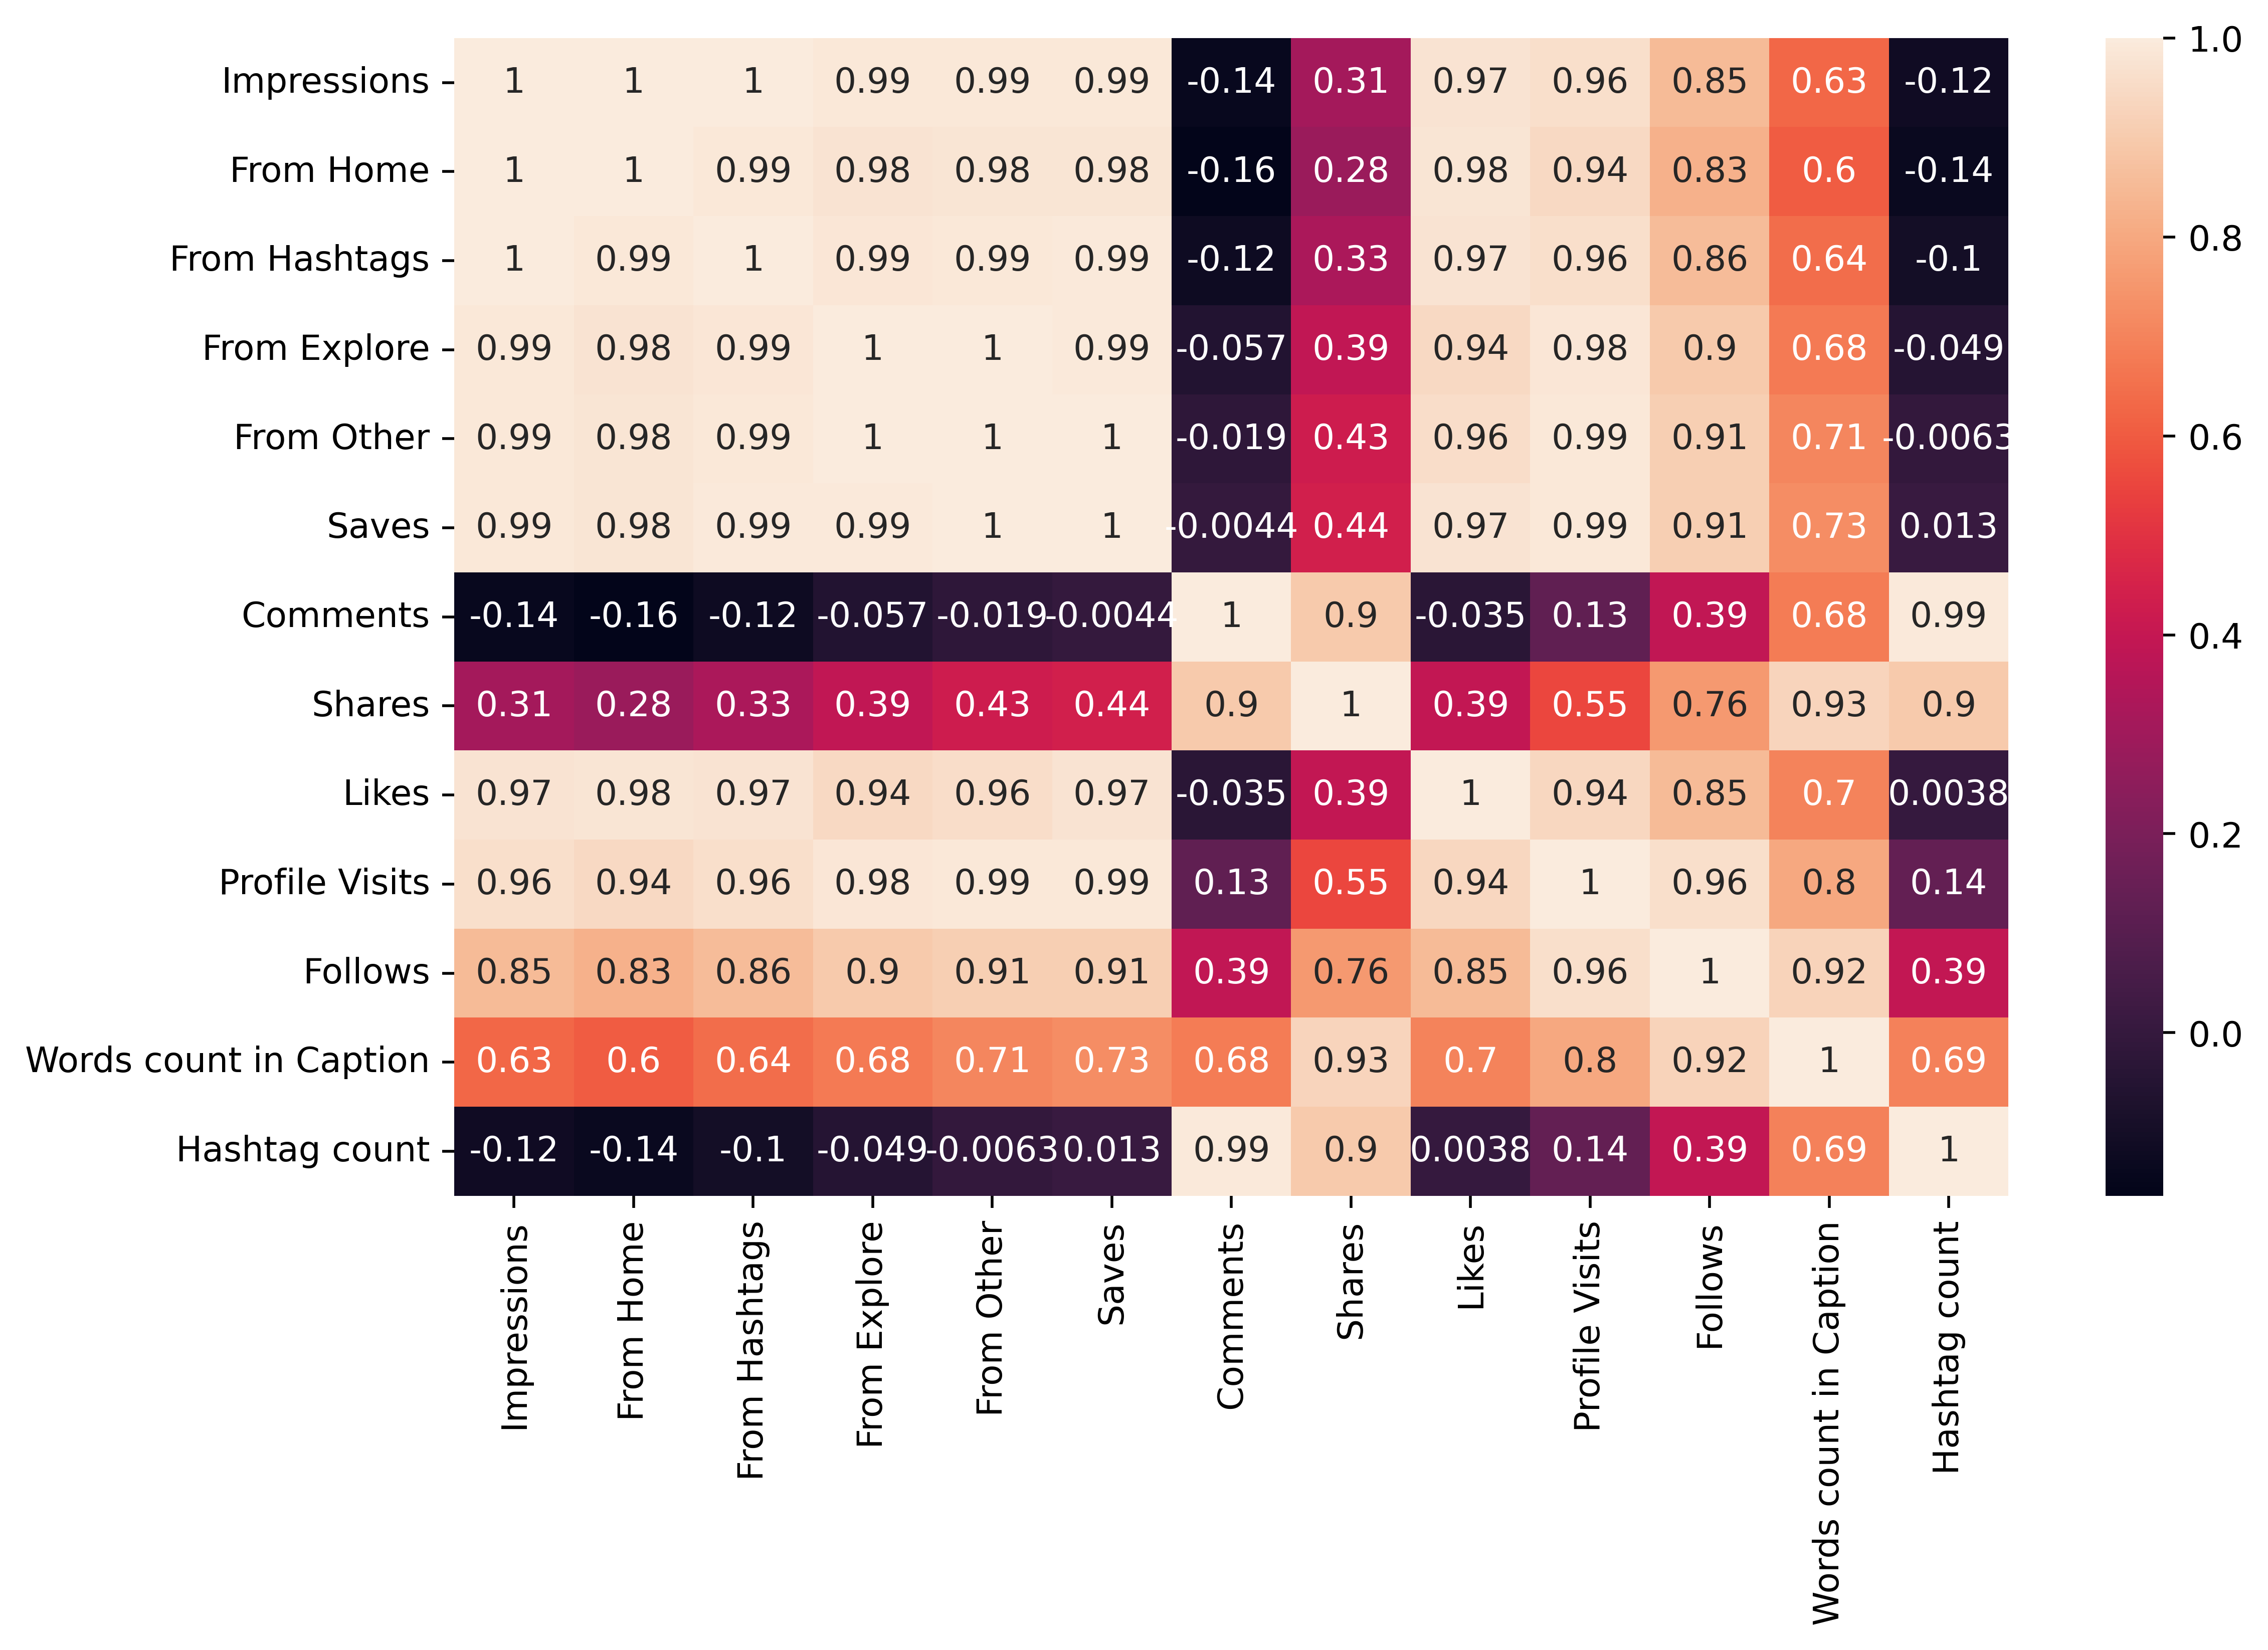

In [98]:
plt.figure(figsize=(10,6), dpi=500)

sns.heatmap(df_corr, annot=True)

plt.show()

# Multi Variate Analysis

Impressions on Instagram refer to the total number of times your content, such as a post or story, has been viewed. Each time your content is displayed on someone's screen, it counts as one impression, regardless of whether the person engaged with it or not. It's an important metric for understanding the reach and visibility of your posts or stories.

Now, let's plot the distribution of Impressions in our data.

<Axes: >

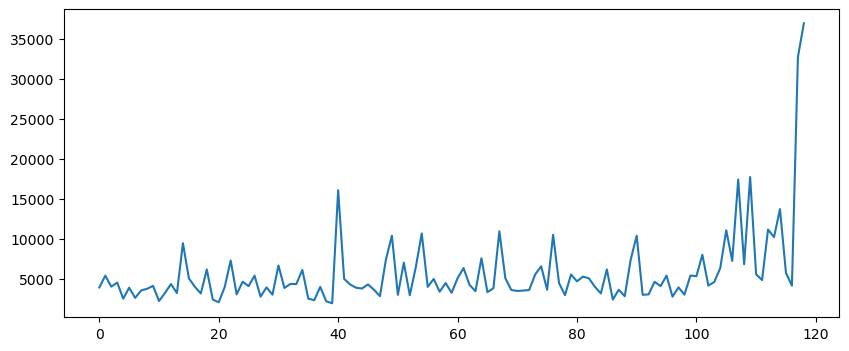

In [150]:
df['Impressions'].plot(figsize=(10,4))

In [176]:
df.head()

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Heres how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  Words count in Caption  \
0  #finance #money #business #investing #investme...                      16   
1  #healthcare #health #covid #data #datascience ...                      34   
2  #data #datascience #dataanalysis #dataanalytic...                      20   
3  #python #pythonprogramming #pythonprojects #py...                      41   
4  #datavisualization #datascience #data #dataana...                      28   

   Hashtag count  
0             22  
1             18  
2             18  
3             11  
4             29

Now to view the post or story, it can be viewed through home page or explore page and so on. Let's plot the bar plot to understand the contribution of each page.

<Axes: >

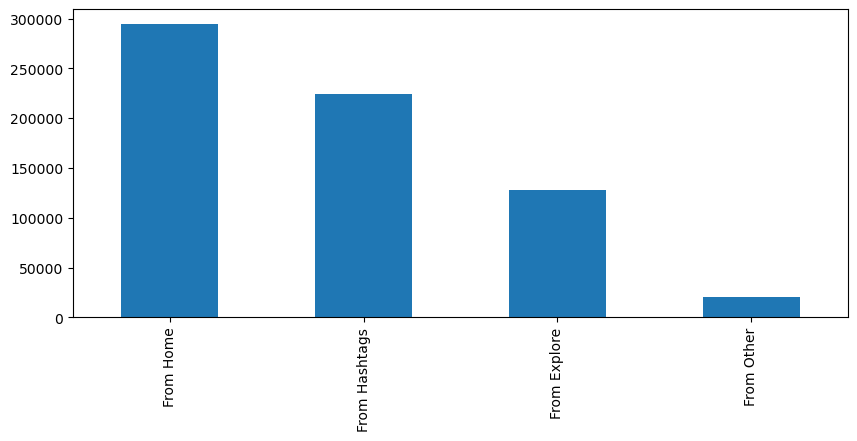

In [186]:
df[['From Home','From Hashtags','From Explore','From Other']].sum().plot(figsize=(10,4), kind='bar')

From the bar-plot, it is observed that the home page plays the most important role in gaining maximum number of impressions, followed by hashtags, explore page and others.

Now we'll observe how the instagram users are engaging with the posts or stories, by using the bar plot.

<Axes: >

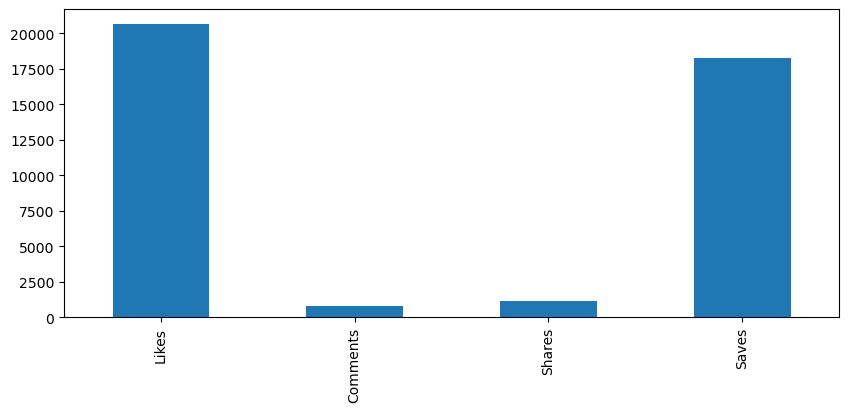

In [184]:
df[['Likes','Comments','Shares','Saves']].sum().plot(figsize=(10,4), kind='bar')

From the above plot, most of the users are engaging by liking the posts followed by saving, sharing and commenting.

To understand what makes a user to like a post, we will plot some regression plots to understand the trends.

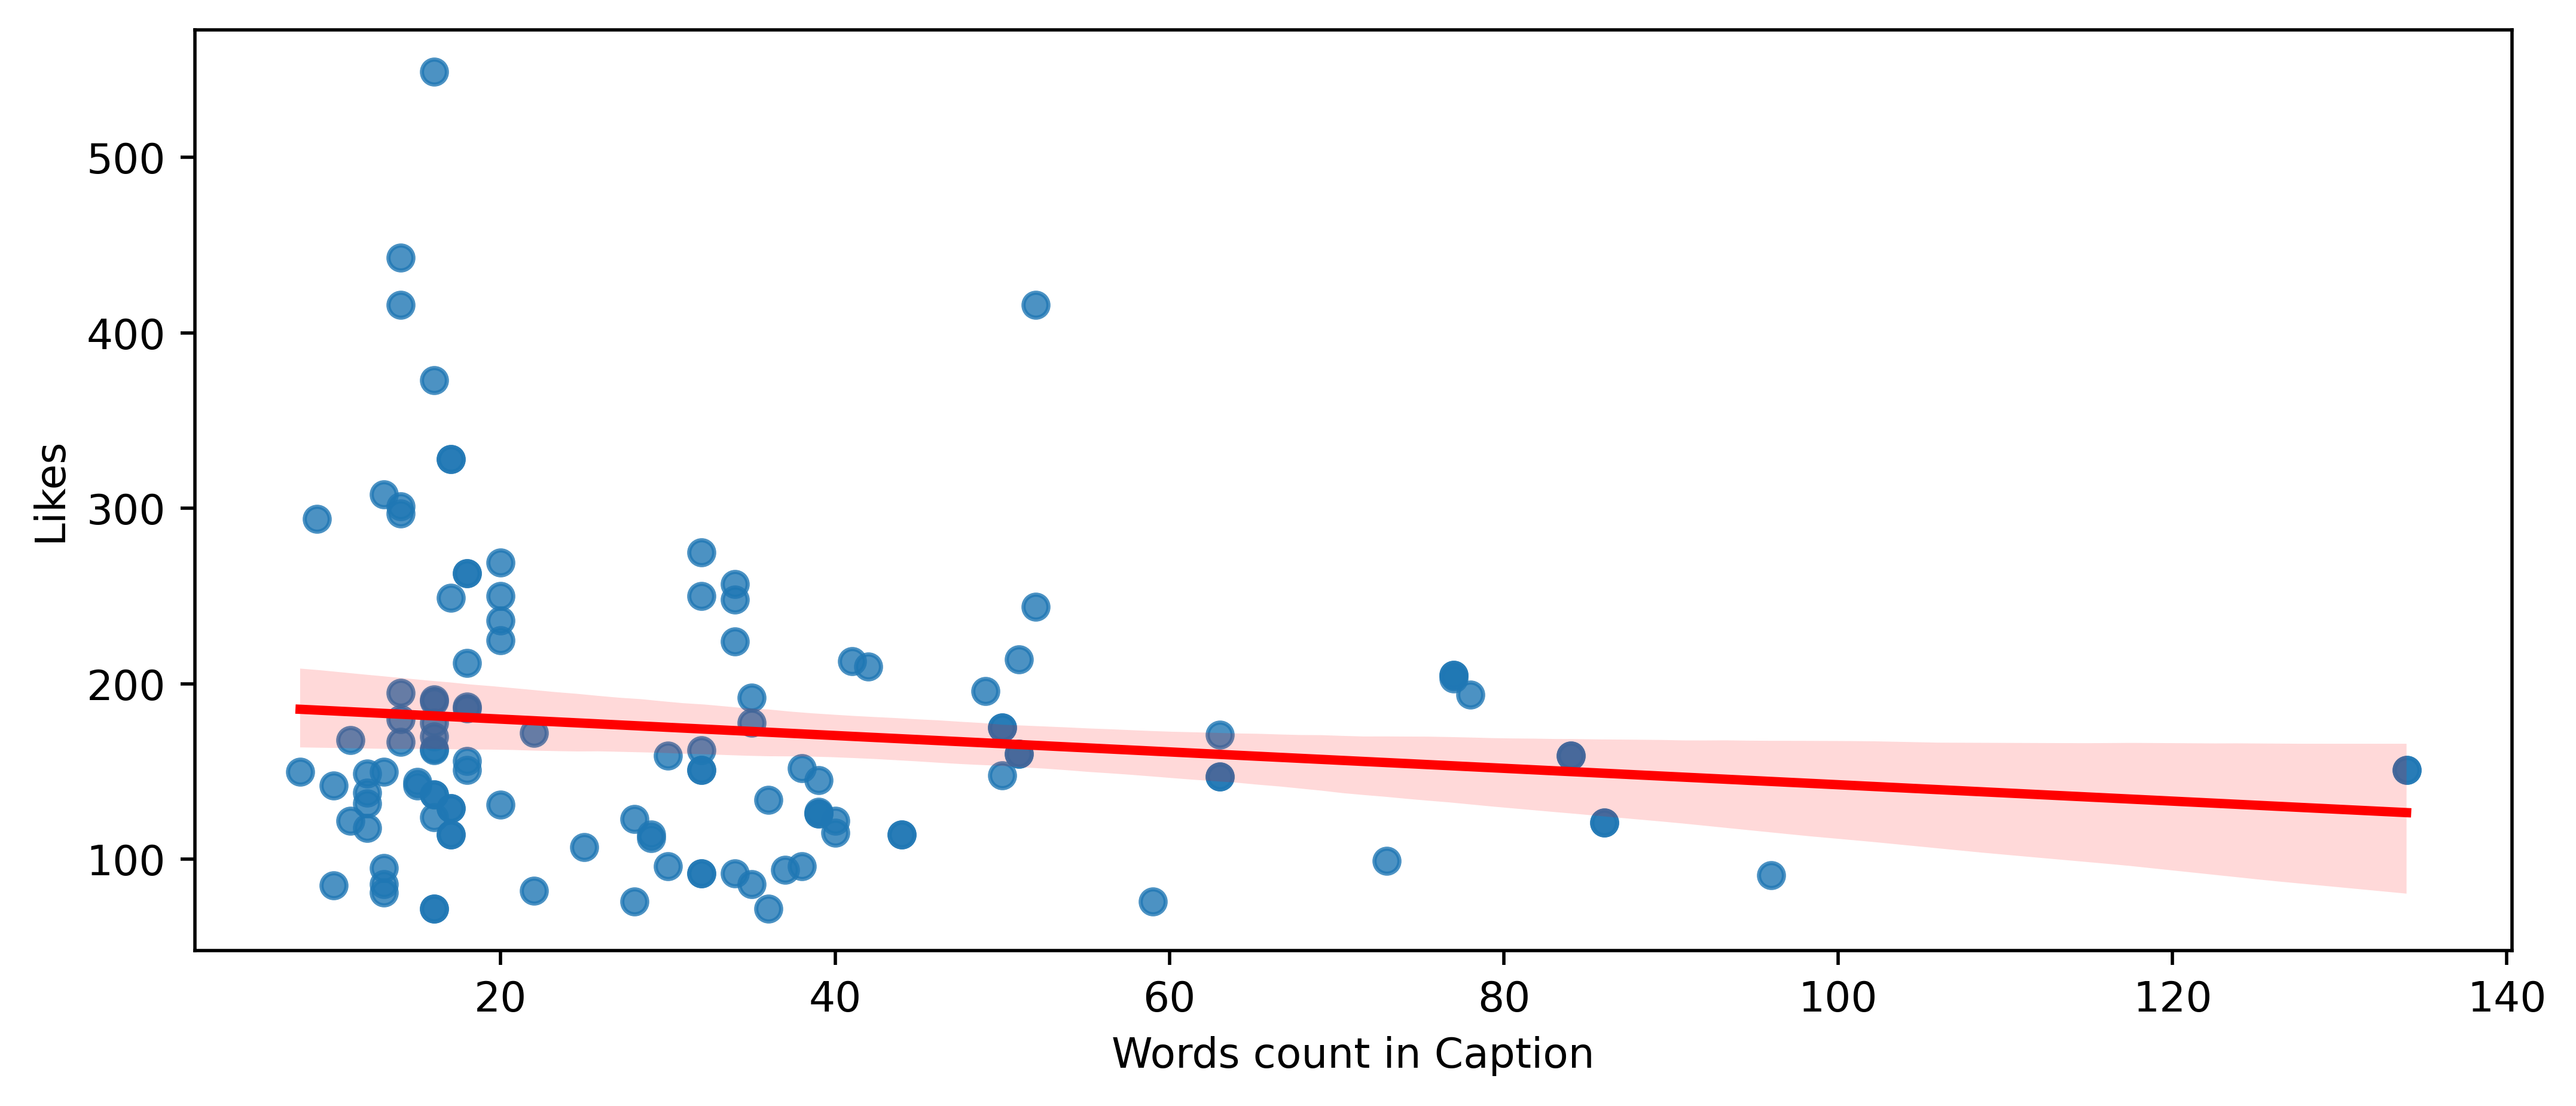

In [194]:
plt.figure(figsize=(10,4), dpi=500)

sns.regplot(x='Words count in Caption', y='Likes', data=df, line_kws={'color': 'red'})

plt.show()

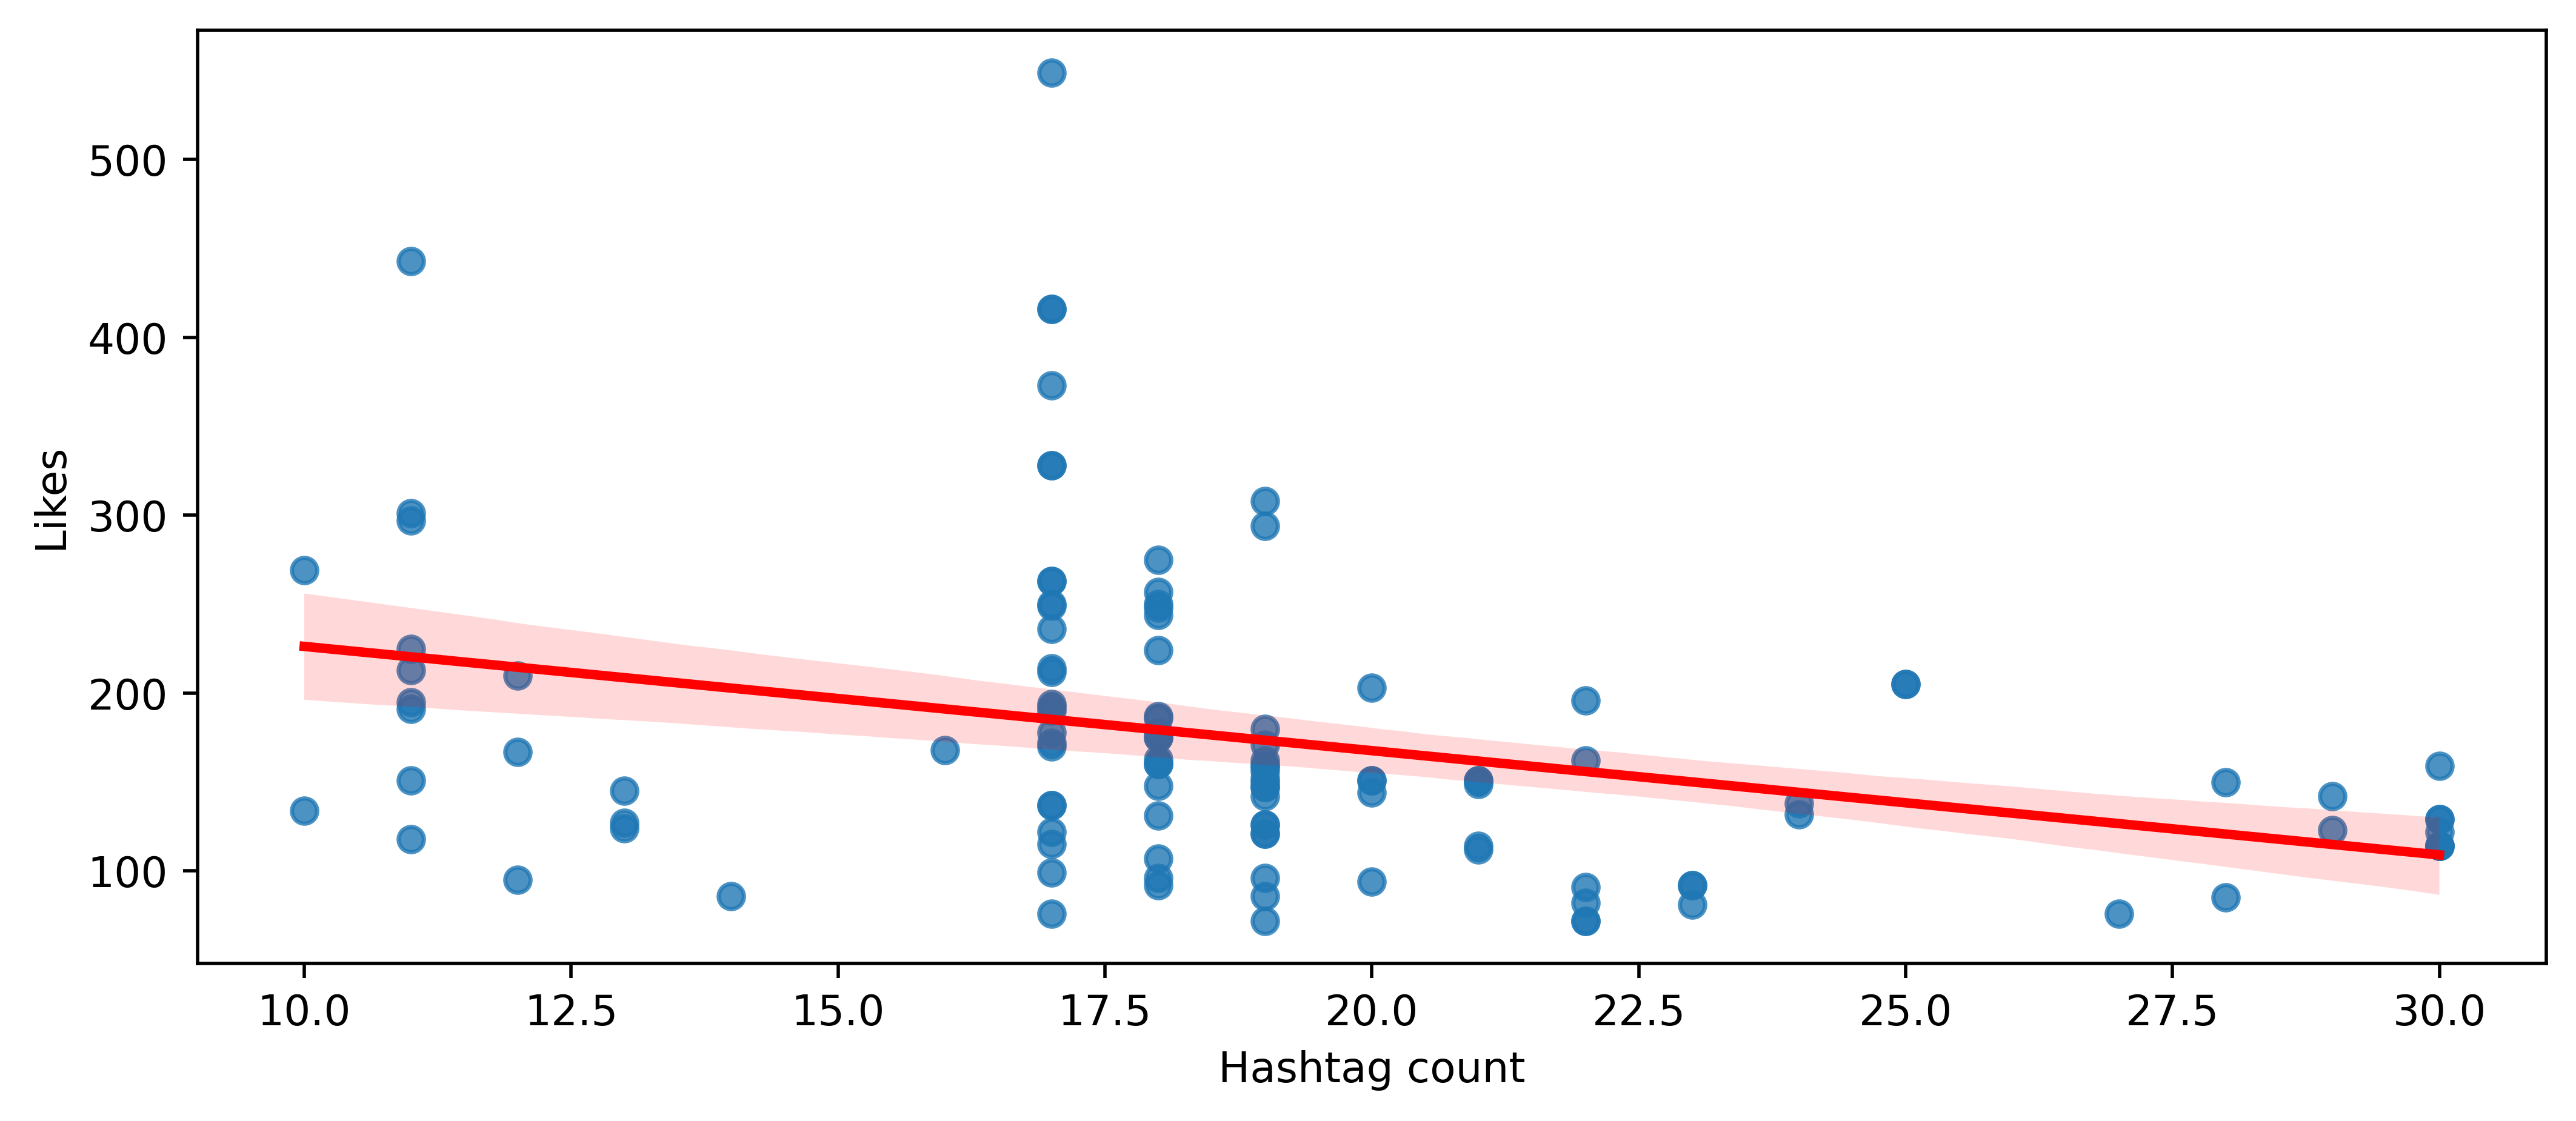

In [195]:
plt.figure(figsize=(10,4), dpi=500)

sns.regplot(x='Hashtag count', y='Likes', data=df, line_kws={'color': 'red'})

plt.show()

From the above 2 plots, it's clear that neither long captions or more number of hashtags help in more users liking a post.

But the authenticity and the quality of the content in the post or story, plays a major role in attracting so many likes,saves, shares from the users. Since we don't have the content in the data it's not possible to show it.

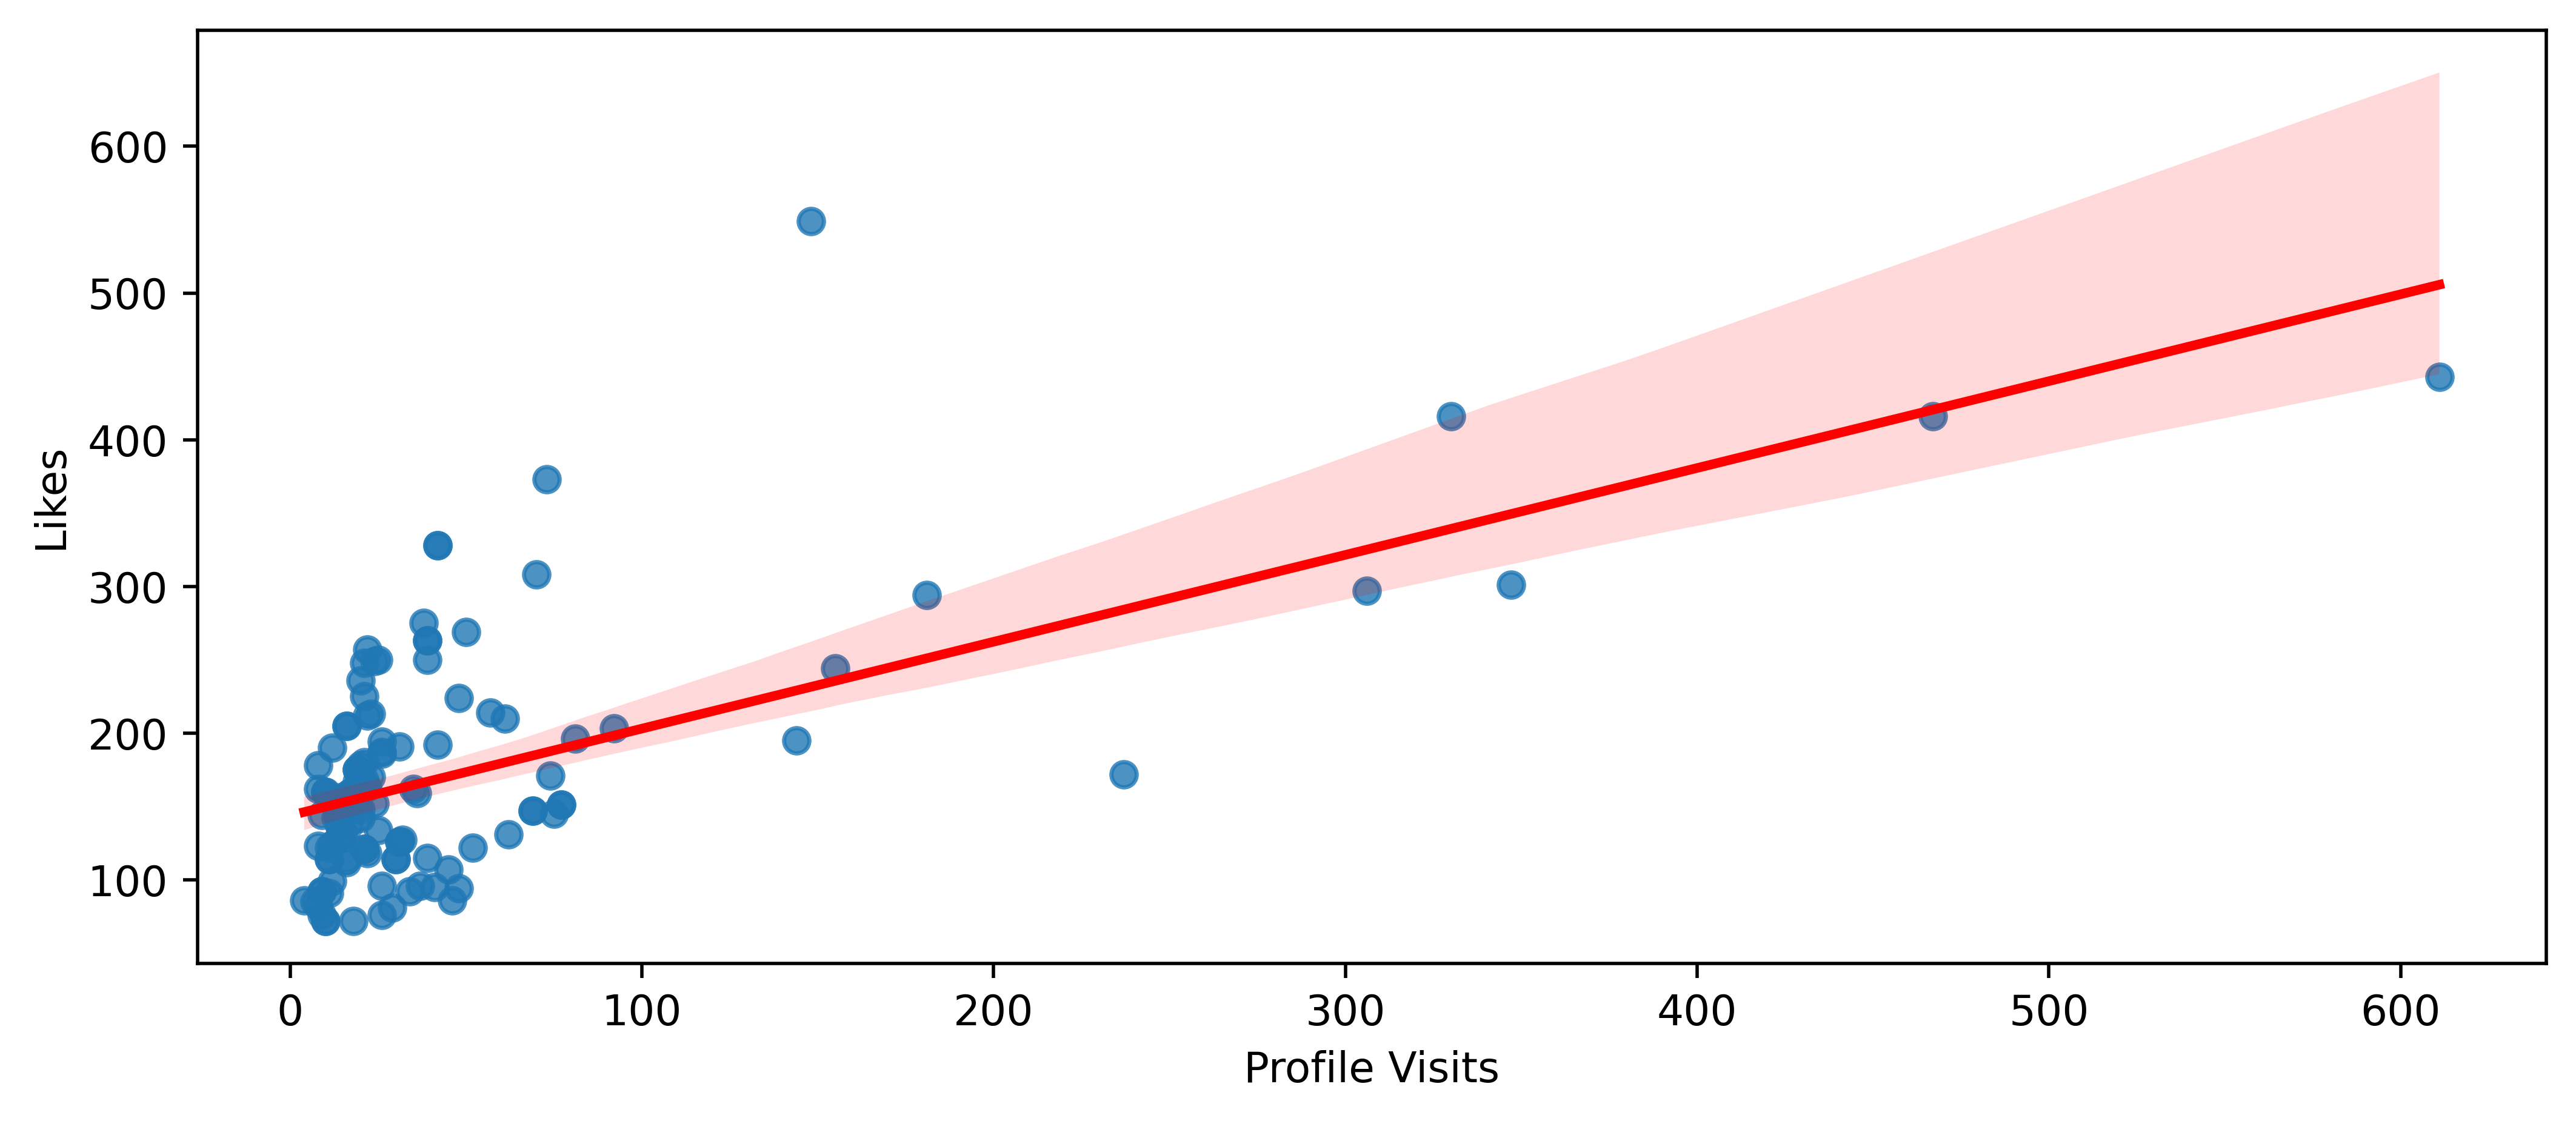

In [191]:
plt.figure(figsize=(10,4), dpi=500)

sns.regplot(x='Profile Visits', y='Likes', data=df, line_kws={'color': 'red'})

plt.show()

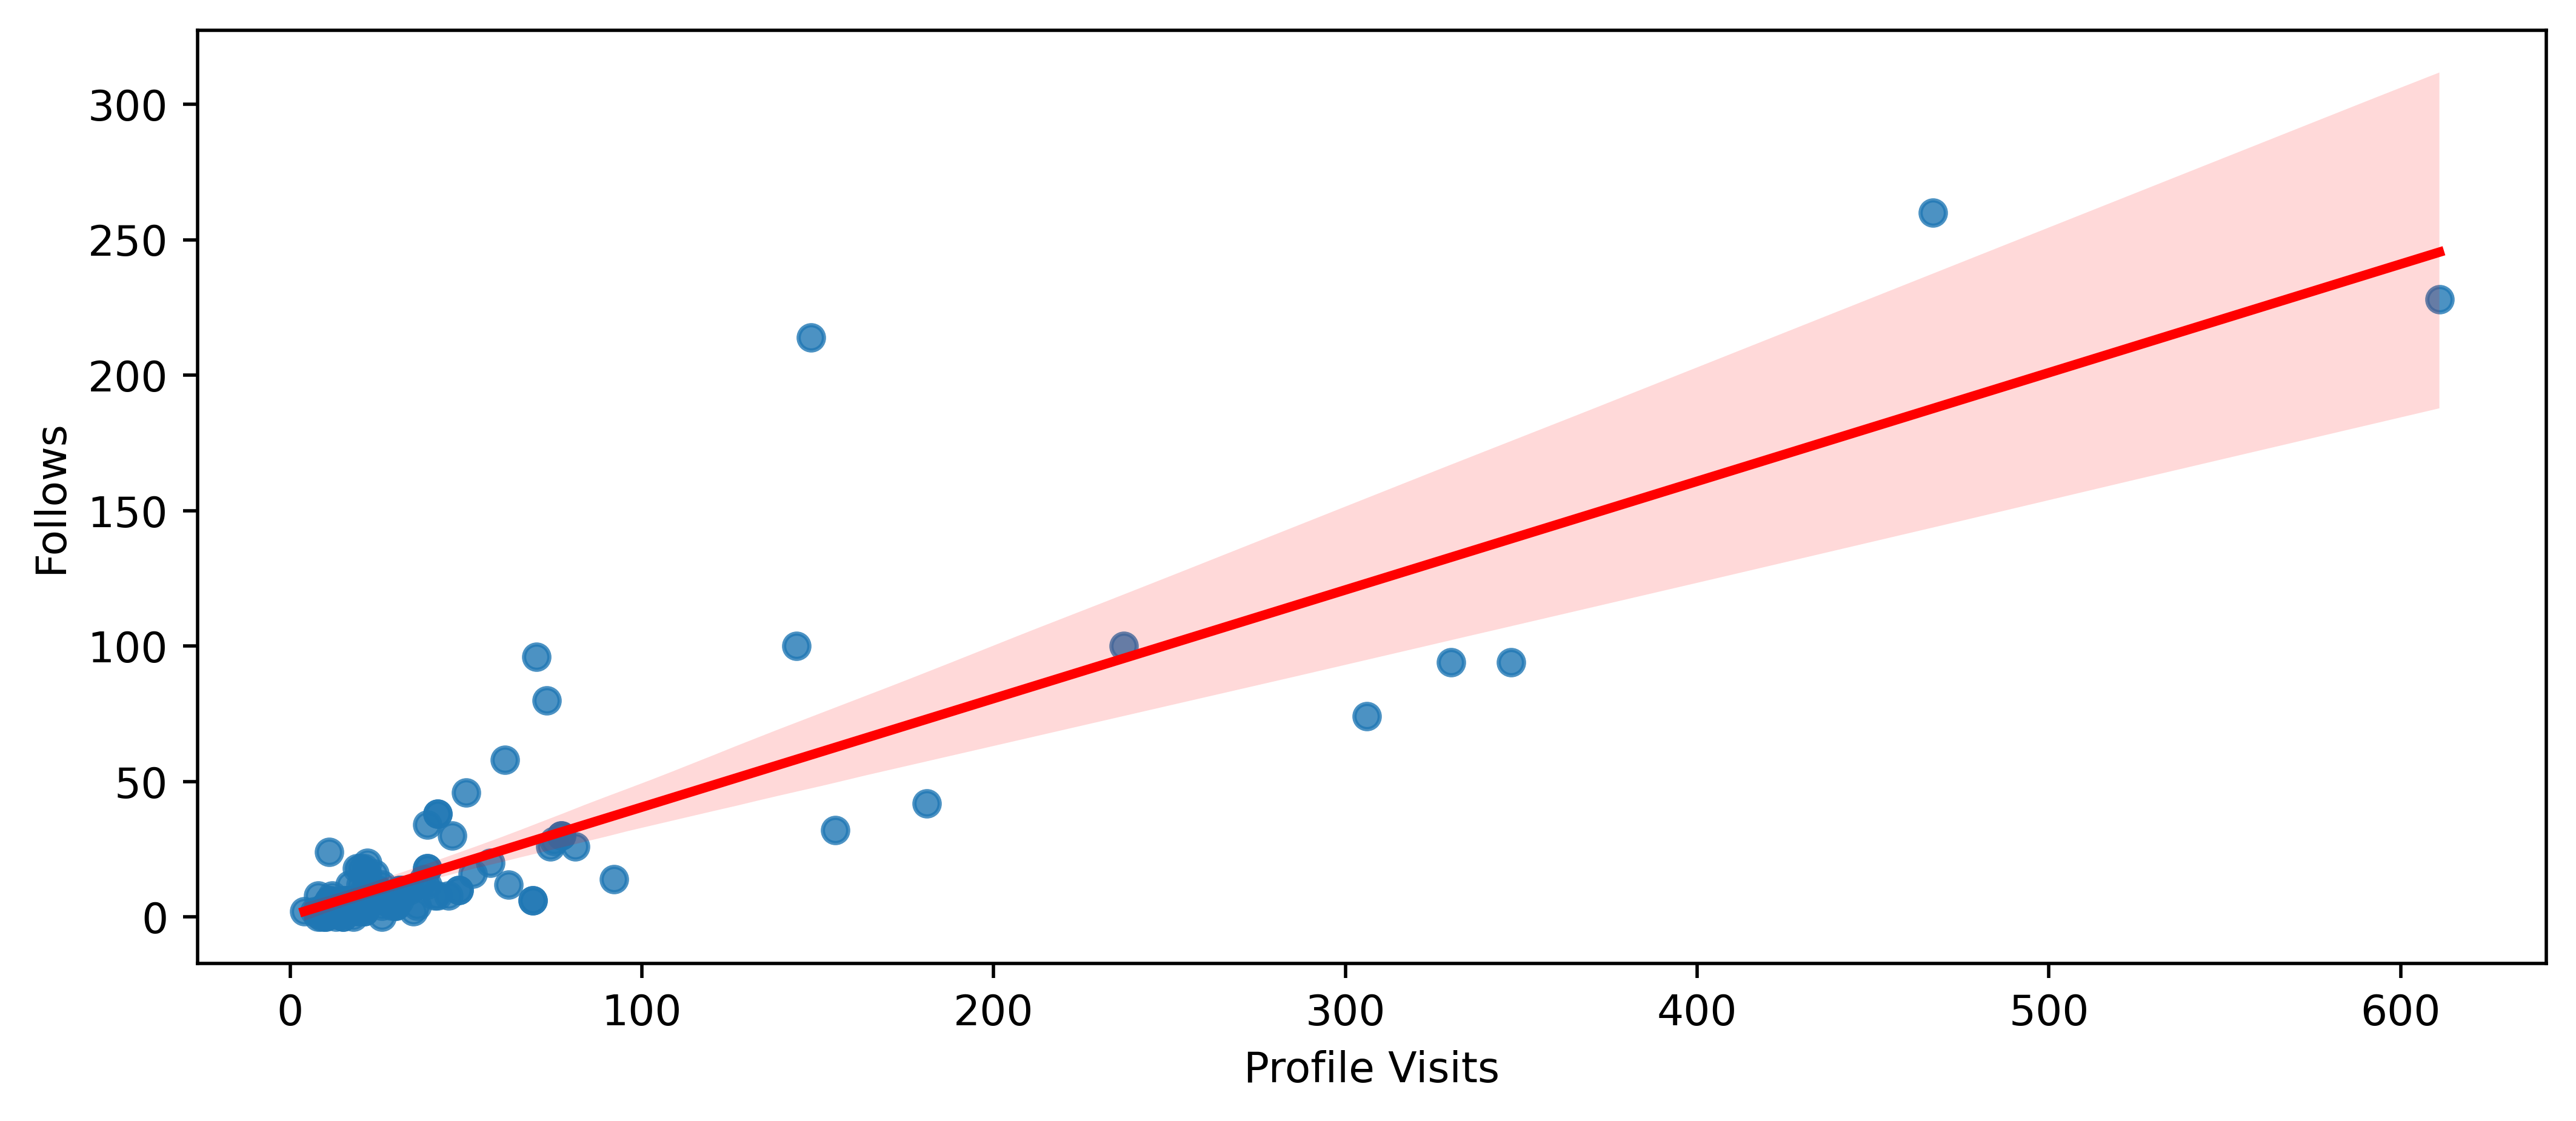

In [197]:
plt.figure(figsize=(10,4), dpi=500)

sns.regplot(x='Profile Visits', y='Follows', data=df, line_kws={'color': 'red'})

plt.show()

As you can see from the above plots, higher the quality of the post the more number of visits the profile will be gaining which will help in getting many likes and gaining many followers as well.

Now since hashtags also play a important role in gaining the impressions to a post after home page, let's find out some of the hashtags that are most popular in gaining the impressions to a post.

We will do that, by finding out the number of times each hashtag has been mentioned in a post.

So let's create a dictionary for that.

In [174]:
hash_tag_count = {}

for ht in df['Hashtags'].str.split():
    for h_t in ht:
        if h_t not in hash_tag_count:
            hash_tag_count[h_t] = 1
        else:
            hash_tag_count[h_t] += 1
        
for ht, count in hash_tag_count.items():
    print(f"Hashtag '{ht}' occurs {count} times.")


Hashtag '#finance' occurs 4 times.
Hashtag '#money' occurs 4 times.
Hashtag '#business' occurs 16 times.
Hashtag '#investing' occurs 4 times.
Hashtag '#investment' occurs 3 times.
Hashtag '#trading' occurs 3 times.
Hashtag '#stockmarket' occurs 3 times.
Hashtag '#data' occurs 88 times.
Hashtag '#datascience' occurs 94 times.
Hashtag '#dataanalysis' occurs 77 times.
Hashtag '#dataanalytics' occurs 87 times.
Hashtag '#datascientist' occurs 83 times.
Hashtag '#machinelearning' occurs 97 times.
Hashtag '#python' occurs 109 times.
Hashtag '#pythonprogramming' occurs 95 times.
Hashtag '#pythonprojects' occurs 90 times.
Hashtag '#pythoncode' occurs 78 times.
Hashtag '#artificialintelligence' occurs 89 times.
Hashtag '#ai' occurs 91 times.
Hashtag '#dataanalyst' occurs 12 times.
Hashtag '#amankharwal' occurs 117 times.
Hashtag '#thecleverprogrammer' occurs 117 times.
Hashtag '#healthcare' occurs 3 times.
Hashtag '#health' occurs 3 times.
Hashtag '#covid' occurs 3 times.
Hashtag '#deeplearning'

In [202]:
hash_tag_count.items()

dict_items([('#finance', 4), ('#money', 4), ('#business', 16), ('#investing', 4), ('#investment', 3), ('#trading', 3), ('#stockmarket', 3), ('#data', 88), ('#datascience', 94), ('#dataanalysis', 77), ('#dataanalytics', 87), ('#datascientist', 83), ('#machinelearning', 97), ('#python', 109), ('#pythonprogramming', 95), ('#pythonprojects', 90), ('#pythoncode', 78), ('#artificialintelligence', 89), ('#ai', 91), ('#dataanalyst', 12), ('#amankharwal', 117), ('#thecleverprogrammer', 117), ('#healthcare', 3), ('#health', 3), ('#covid', 3), ('#deeplearning', 75), ('#machinelearningprojects', 43), ('#datascienceprojects', 43), ('#machinelearningmodels', 7), ('#pythonlearning', 19), ('#pythondeveloper', 19), ('#pythoncoding', 19), ('#pythonprogrammer', 19), ('#datavisualization', 19), ('#bigdata', 20), ('#dataviz', 5), ('#analytics', 16), ('#technology', 25), ('#programming', 26), ('#statistics', 14), ('#coding', 24), ('#businessintelligence', 6), ('#datamining', 6), ('#tech', 23), ('#computersc

Now we will have a look at top 30 hashtags that have been most mentioned in a post by using a bar plot.

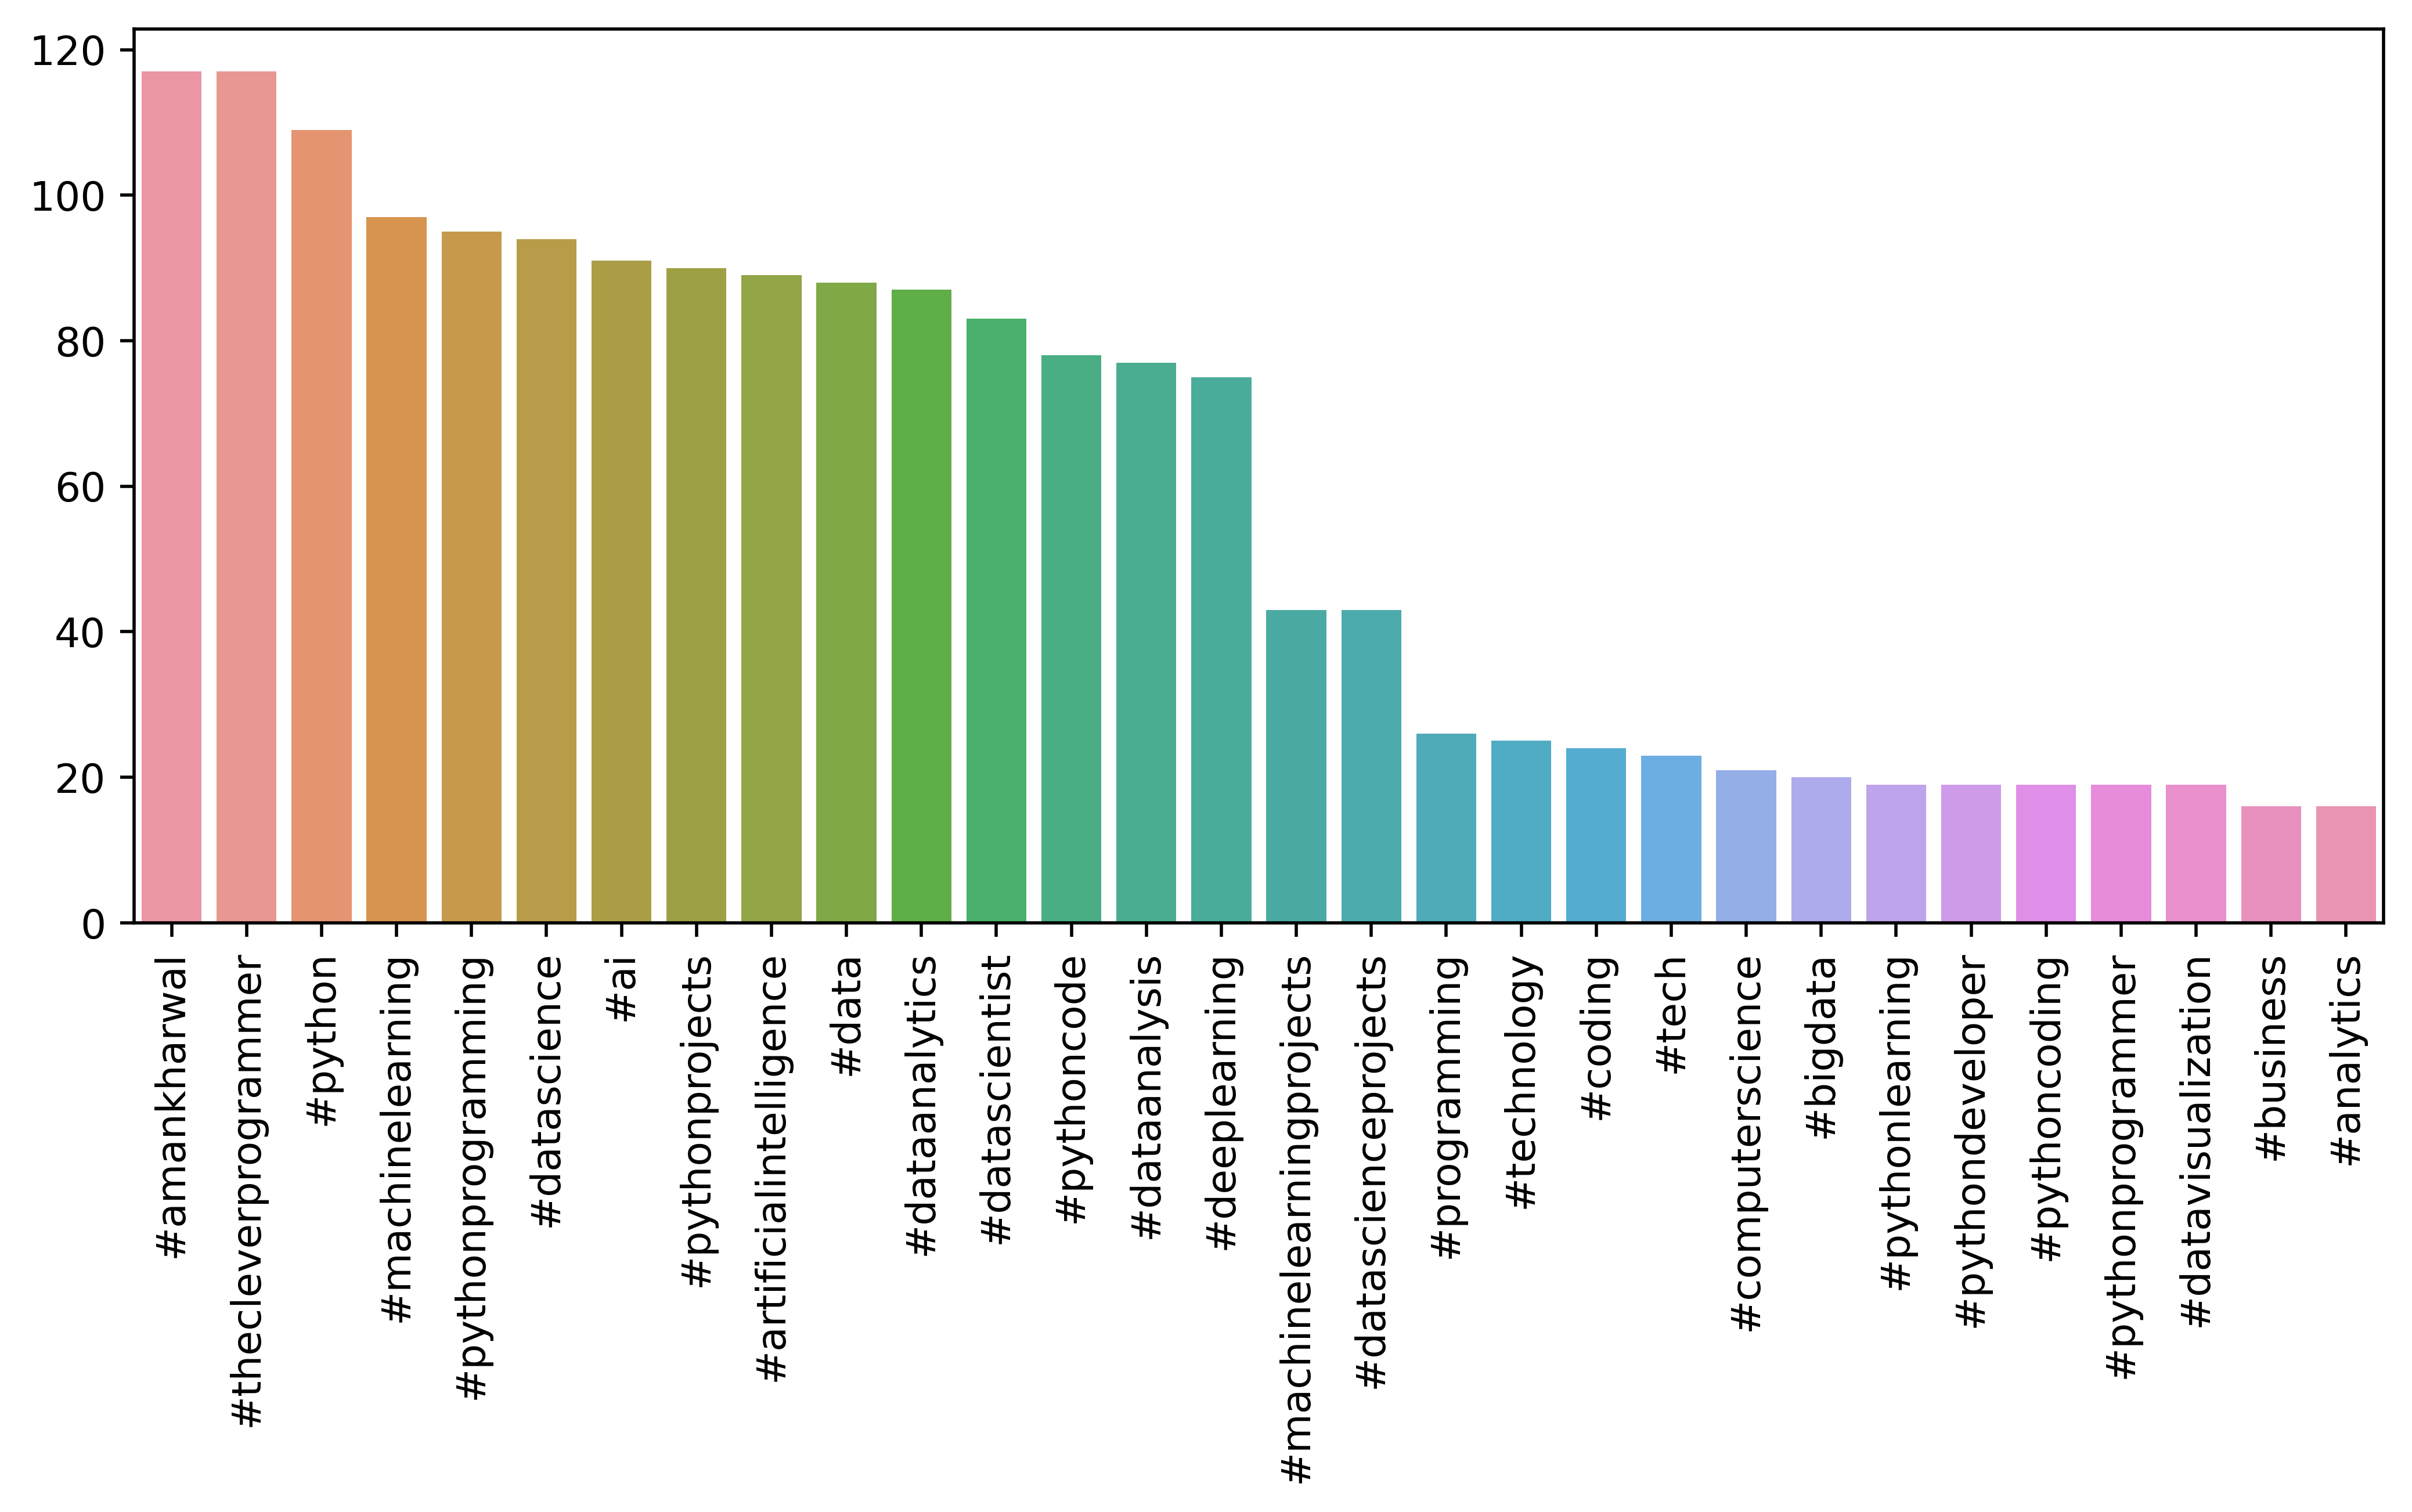

In [200]:
sorted_hash_tags = sorted(hash_tag_count.items(), key=lambda x: x[1], reverse=True)

top_10_hash_tags = dict(sorted_hash_tags[:30])

plt.figure(figsize=(10, 4), dpi=500)
sns.barplot(x=list(top_10_hash_tags.keys()), y=list(top_10_hash_tags.values()))
plt.xticks(rotation=90) 
plt.show()

From the bar plot, it can be observed that some of the most used hashtags are '#thecleverprogrammer', '#python', '#ai' etc.,

In [173]:
top_10_hash_tags = dict(sorted_hash_tags[:30])
top_10_hash_tags

{'#amankharwal': 117,
 '#thecleverprogrammer': 117,
 '#python': 109,
 '#machinelearning': 97,
 '#pythonprogramming': 95,
 '#datascience': 94,
 '#ai': 91,
 '#pythonprojects': 90,
 '#artificialintelligence': 89,
 '#data': 88,
 '#dataanalytics': 87,
 '#datascientist': 83,
 '#pythoncode': 78,
 '#dataanalysis': 77,
 '#deeplearning': 75,
 '#machinelearningprojects': 43,
 '#datascienceprojects': 43,
 '#programming': 26,
 '#technology': 25,
 '#coding': 24,
 '#tech': 23,
 '#computerscience': 21,
 '#bigdata': 20,
 '#pythonlearning': 19,
 '#pythondeveloper': 19,
 '#pythoncoding': 19,
 '#pythonprogrammer': 19,
 '#datavisualization': 19,
 '#business': 16,
 '#analytics': 16}

# Conclusion

From the EDA we have implemented on the above data, we were able to obtain some insights how instagram works and how content creators need to post high quality content for the good engagement and reach of their posts that will help with the growth of their profiles.